#**CIS 419/519**

## Linear Regression worksheet 

In this worksheet, you will explore two illustrative examples for linear regression. 

First, you will run a simple linear regression example using the `scikit-learn` library [1]. This example uses the 'bmi' feature of the diabetes dataset to perform linear regression. More details on this dataset can be found [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). As elaborated, the first feature corresponds to the age of the subjects, in years. The targets for this dataset give a quantitative measure of diabetes progression.

In the second example, you will compare the closed-form solution of ordinary leasts square (OLS) which will be covered in class, with the solution obtained by the linear regression function in the `sklearn` package.

In the third example, you will get an introduction to base expansion for polynomial regression in sklearn.

In the fourth example, you will learn about l2 regularization and the impacts of the lambda hyperparameter.

---
#Example 1 - Running linear regression with `scikit-learn`

In this example, we wish to build a linear regression model that _predicts_ diabetes progression quantitatively, based on some selection of our features. To this end, we extract the dataset from the `sklearn` library and using the `LinearRegression()` function in `linear_model` of the `sklearn` library.

Next, we load the dataset, perform pre-processing (extract first feature and split up the dataset into training and validation sets).

In [ ]:
# Import numpy and pandas for data processing
import numpy as np
import pandas as pd

# Load the diabetes dataset from sklearn
from sklearn import datasets
# Loads as a dict with data, target, feature_names, etc.
diabetes = datasets.load_diabetes()

#Let's use dataframes so that we can easily get some descriptive statistics
diabetes_X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
diabetes_y = pd.DataFrame(diabetes.target, columns = ['Disease Progression Indicator'])
diabetes_X.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [ ]:
diabetes_y.describe()

,Disease Progression Indicator
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


**Question:** Why might it be especially important to know some of these descriptive statistics (especially for the target variable) when dealing with a regression problem?

For the sake of plotting simplicity, we are going to just start out using a single variable, bmi. We of course could use more predictors, but this makes our result much harder to visualize, unless we reduce the dimensionality of the data in some way. It also brings up issues of feature selection. Both of these topics will be covered later in the course.

In [ ]:
# Split the data into training/testing sets, using only the 'bmi' feature
from sklearn.model_selection import train_test_split

diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X[['bmi']], diabetes_y, test_size = .33, random_state = 42)


With the datasets, we can now train the linear regression model and make predictions.

In [ ]:
# Import linear_model to create our regression object
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

Finally, we print out important output parameters and metrics, and visualize our model/predictions with plots.

The straight line can be seen in the plot, illustrating how linear regression is used to draw a straight line that minimizes the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation. 

The coefficients, residual sum of squares and the coefficient of determination are also calculated. 

Coefficients: 
 [[972.87627375]]
Intercept: 
 [150.26267496]
Mean squared error: 3934.07
Coefficient of determination: 0.32


Text(0, 0.5, 'y_test')

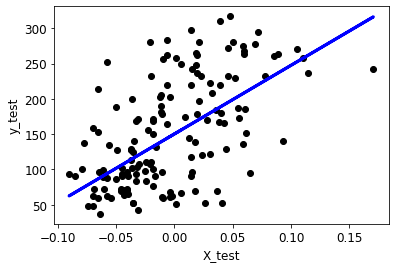

In [ ]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import the metrics we will use to score our model
from sklearn.metrics import mean_squared_error, r2_score


# The coefficients
print('Coefficients: \n', regr.coef_)
# The intercept
print('Intercept: \n', regr.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xlabel('X_test')
plt.ylabel('y_test')


### Coefficient of determination (or) $R^2$ score

The coefficient of determination (or) $R^2$ is the proportion of the variation in the target/dependent variable that is predictable from the feature(s)/independent variable(s). In a dataset with $N$ datapoints, let $y_{i}$ and $\hat{y}_{i}$ be the $i^{th}$ observation of dependent variable and its prediction respectively. $R^2$ is calculated as:

> #### $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

where

*   $SS_{res} = \sum_{i=1}^{N} (y_{i} - \hat{y}_{i})^2$
*   $SS_{tot} = \sum_{i=1}^{N} (y_{i} - \bar{y})^2$
> *   $\bar{y} = \frac{\sum_{i=1}^{N} y_{i}}{N}$

### Properties of $R^2$

*   $R^2 \in (-\infty, 1]$ 
*   $R^2 = 1$ if $SS_{res} = 0$, i.e., all the predictions match the actual values
*   $R^2 = 0$ if $SS_{res} = SS_{tot}$, i.e., the predictions are only as good as fitting a constant value (the mean of the actual values)
*   $R^2 < 0$ if $SS_{res} > SS_{tot}$, i.e., the predictions are worse than even fitting a constant value



---

#Example 2- Comparing closed-form solution with `scikit-learn`

Next, we provide an example on how the closed-form solution for ordinary least squares compares with the linear regression module in `scikit-learn`. 

Observe how the `numpy` package is used to perform vector and matrix computations. Notice how the features in the dataset $x$ are **vectorized** using `numpy`, and also observe the code syntax used to compute the closed form OLS solution. This implies that with vectorization, vector and matrix computations can be made more efficient, and for and while loops are often not required for computation with respect to the values in the dataset.

---

First, we generate a random dataset with features, $X$ and targets, $y$. We then use the closed-form solution to compute the weights of the linear regression model, $w$. Then, we predict targets $y_{est}$ based on this model. Finally, we output the norm of the prediction error and plot the features against the true and predicted targets.

In [ ]:
# Generate a dataset with random features (X) and targets (y)
x     = np.random.random(10) 
x     = np.sort(x)
X     = np.vstack([np.ones(len(x)), x]).T 
y     = X @ np.array([0.5,2.0]) + np.random.normal(0,0.25,len(x))

# Closed-form solution for OLS
w     = np.linalg.inv(X.T@X)@ X.T@y

# Predicted targets
y_est = X @ w

# Norm of the error between the true and predicted targets
print(np.linalg.norm(y-y_est))

0.6574732640052536


In [ ]:
print(np.array([0.5,2.0]))

[0.5 2. ]


Next, we use the linear regression module in `sklearn` to do linear regression. The yellow line gives the closed-form solution for OLS, while the black line plots the solution obtained with the `sklearn` linear regression function. As expected, we get a very similar result, as shown in the plot below. 

0.6574732640052534


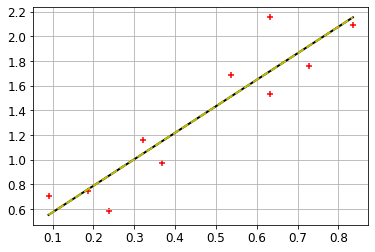

In [ ]:
ols   = linear_model.LinearRegression()
ols.fit(X,y)
y_est_ols = ols.predict(X)

print(np.linalg.norm(y-y_est_ols))

plt.plot(x, y_est_ols, 'k', linewidth=2)
plt.plot(x, y_est, 'y--', linewidth=2)
plt.scatter(x, y, s=30, c='red', marker='+')
plt.grid('on')

## Example 3- Feature Scaling
Often we find that the features of the data we used are not at the same scale/units so it is necessary to rescale features that have different units to have same scale/units.

To test, let's look at a dataset used to analyze the chance to get admitted to a university based on various factors. Make sure to download the Admission_Predict.csv from Canvas and upload it to your Colab session before continuing!

In [ ]:
# Loading the Dataset admission prediction with the target column as chance of admit 
df = pd.read_csv("Admission_Predict.csv")
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
# Let's drop serial number, as it just seems to be an id number and will hurt our model
# We will also split our features and target
df.drop("Serial No.",axis=1, inplace=True)
y = df['Chance of Admit ']
x = df.drop("Chance of Admit ",axis=1)

We can see that many of our variables are on completely different scales (some wildly so). Since regression is scale-variant, something like CGPA will have basically no power when compared to the much larger absolute changes in GRE score.

### Standardization
Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation. In sklearn, we do this by creating a StandardScaler() object. This object can be fit to data to learn parameters such as a column's mean and standard deviation. It can then be used to transform data through the scaler's formula.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Create our scaler
scaler = StandardScaler()

# First, we want to fit our scaler to our training data and subsequently transform
# that training data through our scaler. This can all be done in a single command.
x_train_scaled = scaler.fit_transform(x_train)

# Next, we want to transform the test features by using the parameters learned 
# from the training set
x_test_scaled = scaler.transform(x_test)

# Notice the values are now standardized
columns = x.columns
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns = columns)
x_train_scaled_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.457111,0.424662,-0.057308,0.127156,-1.059652,0.139866,0.927613
1,0.102289,0.424662,-0.057308,0.617396,-0.501940,0.361100,-1.078036
2,2.053813,2.085930,1.689221,1.107637,1.171194,2.250095,0.927613
3,0.279700,-0.572099,-0.057308,-0.363084,-1.059652,-0.030313,0.927613
4,-0.163828,-1.236607,-1.803837,-1.343565,-1.059652,-1.085428,-1.078036


**Important Question:** Why is it important that we split our data before scaling and not after?

In [ ]:
# fitting the linear regression model over our standardized data

lr_std = LinearRegression()
lr_std.fit(x_train_scaled,y_train)
y_pred_scale = lr_std.predict(x_test_scaled)
print('R2 of linear regression on test set with standardized features: {:.3f}'.format(lr_std.score(x_test_scaled, y_test)))


R2 of linear regression on test set with standardized features: 0.821


Note: standardization is not the only way to scale data! Different scalers can be more applicable to different distributions, and we encourage you to read up on the documentation [here](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

### Pipelines and Grid-search
In general, we may often require data to go through a series of transformation (like the standard scaling we did above), and it is useful to integrate all those transforms into a 'pipeline'. These pipelines contain a set of transforms and an estimator at the end (like Sklearn's LinearRegression() estimator). 

Thus, by incorporating multiple transforms into a pipeline, we do not need to call the fit and transform functions for each of the transformation instances. It also allows us to treat the system as a unit and perform more complex functions like grid-search on them more easily! 

Moreover, if you were to perform cross-validation on X_train after processing, then when X_train is split into validation and training sets, the train sets in each of these folds will contain some information about the test as the standardization was done accounting for the entire X_train. Using a pipeline will not have this limitation.


In the example below we will create a pipeline which does scaling and then fits the model to a Linear Regression estimator, and then performs gridsearch over some aritrary set of hyper-parameter values!

In [ ]:
from sklearn.pipeline import make_pipeline

# First we can use the make_pipeline( <transformations> ) function to create a pipeline
pipeline = make_pipeline(StandardScaler(), LinearRegression()) # define the pipeline object. Note: the last in the list has to be an estimator (like DecisionTreeClassifier or LinearRegression).

#Now this pipeline can be used like any estimator - it will have the fit, predict, score functions along with many more. 
pipeline.fit(x_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
#we can get y_pred the same way as before
y_pred=pipeline.predict(x_test)

# Scoring function is also the same as before
score = pipeline.score(x_test,y_test)
print('R2 of linear regression on test set with standardized features: {:.3f}'.format(score))

R2 of linear regression on test set with standardized features: 0.821


As you can see, this is the same as what we did manually above, but more stream-lined and easier!

## Polynomial Regression

Sometimes, a linear trend simply doesn't describe our relationship. In those cases, it helps to use basis expansion to create a polynomial regression. Let's start with some made-up data that demonstrates our point. 

Note: we're just going to show how our trends fit our underlying data, so we won't be splitting this one or trying to predict unseen data. We'll do that in the next section on L2 Regularization

Text(0, 0.5, 'Y')

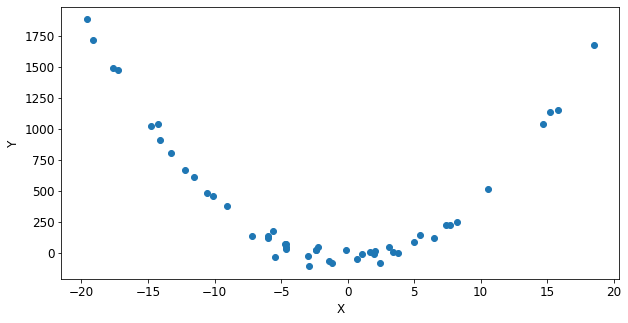

In [ ]:
# create a dataset with 2nd degree polynomial relationship
np.random.seed(42)
x=10*np.random.normal(0,1,50)
y= 5*(x**2)+ np.random.normal(-50,50,50)

# Plot it!
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')

R2: 0.0706116810583789


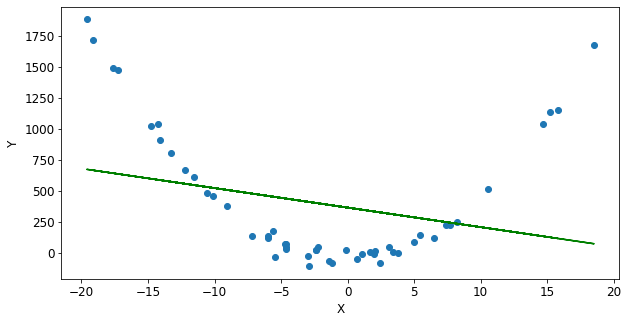

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Create a linear regression to fit the data
lr = LinearRegression()
# Note: we reshape x and y into 2d arrays to fit sklearn's LinearRegression 
# format, but the data is essentially the same
lr.fit(x.reshape(-1,1),y.reshape(-1,1))
y_preds = lr.predict(x.reshape(-1,1))
print(f'R2: {lr.score(x.reshape(-1,1),y.reshape(-1,1))}')

# Plot the regression line against the data
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(x,y_preds, color = 'g')

Clearly, our linear trend is not accounting for the actual relationship. Now let's try a polynomial one.

We aim to fit a polynomial regression of degree 2. We achieve this by generating the polynomial features of degree 2 from the original set of features. For example, if the original features are [$x_{1}, x_{2}, x_{3}$], the transformed features would be [$x_{1}, x_{2}, x_{3}, x_{1}^2, x_{1}x_{2}, x_{1}x_{3}, x_{2}^2,  x_{2}x_{3}, x_{3}^2$].

In sklearn, we can go about this by using a PolynomialFeatures transformer

Linear_R2: 0.0706116810583789
Polynomial_R2: 0.9938444986968292


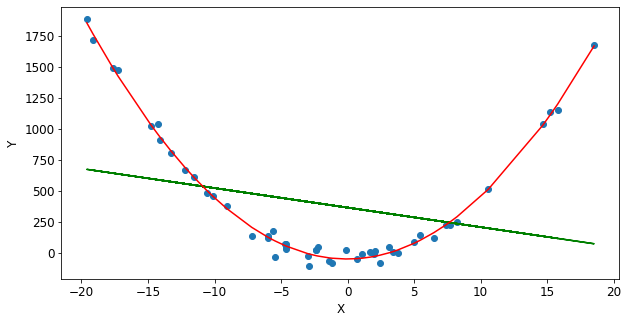

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# We create a "polynomial transformer" that transforms the original set of features into polynomial features
poly_transform = PolynomialFeatures(degree=2, include_bias=False)

# Now fit the transformer and use it to transform our data
x_poly = poly_transform.fit_transform(x.reshape(-1,1))

# Now we simply fit a linear regression to our transformed data
model = LinearRegression()
model.fit(x_poly, y.reshape(-1,1))
poly_preds = model.predict(x_poly)

# Print our two models' R2 scores
print(f'Linear_R2: {lr.score(x.reshape(-1,1),y.reshape(-1,1))}')
print(f'Polynomial_R2: {model.score(x_poly,y.reshape(-1,1))}')

# Plot both lines against the data
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(x,y_preds, color = 'g')

# sort our predicted values with respect to x so our trend shows correctly
sorted_zip = sorted(zip(x,poly_preds))
x_poly, poly_preds = zip(*sorted_zip)

plt.plot(x_poly,poly_preds, color = 'r')

What do you know? This seems to fit the underlying data much more closely!

## $L_{2}$ Regularization

The objective function that has to be minimized in $L_{2}$ regularization (or) ridge regression is:

> $L(\theta) = \frac{1}{N} \sum_{i=1}^{N} (h_{\theta}(x_{i}) - y_{i})^2 + \lambda \sum_{j=1}^{D} \theta_{j}^2$

$\lambda$ is the regularization hyperparameter and it is non-negative.

We shall be using the diabetes dataset from scikit-learn for illustrating ridge regression.


In [ ]:
# Required imports

import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [ ]:
# Load the dataset and split it into train and test sets 

diabetes = load_diabetes()

X = diabetes["data"]
y = diabetes["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

We aim to fit a polynomial model of degree 2 with regularization hyperparameter ($\lambda$) as 1000. 

We achieve this using the following sequence of steps:

1. As we just explained above, generate the polynomial features of degree 2 from the original set of features. Reiterating the above example for convenience, if the original features are [$x_{1}, x_{2}, x_{3}$], the transformed features would be [$x_{1}, x_{2}, x_{3}, x_{1}^2, x_{1}x_{2}, x_{1}x_{3}, x_{2}^2,  x_{2}x_{3}, x_{3}^2$].

2. Scale the polynomial features using standard scaling (subtracting by mean and dividing by standard deviation). Feature scaling is a mandatory step for ridge regression.

3. Fit the ridge regression model with $\lambda$ as 1000.



In [ ]:
# Step 1: Polynomial Features Generation

# As in the previous section, create a "polynomial transformer" that transforms the original set of features into polynomial features
poly_transform = PolynomialFeatures(degree=2, include_bias=False)

# remember to transform the test data using the transformer fit to the train data!
X_train_poly = poly_transform.fit_transform(X_train)
X_test_poly = poly_transform.transform(X_test)

# Step 2: Feature Scaling

scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

# Important: We fit the scaler to the training set and use it to transform the test set features 
X_test_poly_scaled = scaler.transform(X_test_poly)

# Step 3: Ridge Regression Fit

# Note: alpha is the regularization hyperparameter value
model = Ridge(alpha=1e3, random_state=0)

model.fit(X_train_poly_scaled, y_train)

# Accuracy on train set
y_train_pred = model.predict(X_train_poly_scaled)
train_rmse = np.mean((y_train - y_train_pred)**2)**0.5
print("Train set RMSE:", round(train_rmse, 4))

# Accuracy on test set
y_test_pred = model.predict(X_test_poly_scaled)
test_rmse = np.mean((y_test - y_test_pred)**2)**0.5
print("Test set RMSE:", round(test_rmse, 4))

Train set RMSE: 59.292
Test set RMSE: 60.6281


## Effect of regularization hyperparameter on model accuracy

We shall now vary the value of $\lambda$ and analyze the accuracy of the fit model on both train and test sets.

In [ ]:
# Creating arrays to store rmse values
train_rmse_arr = np.array([])
test_rmse_arr = np.array([])

# The lambda values we will use
alphas = [10**i for i in range(-6, 7)]

# For each lambda, we create a new model and store both the training and
# test accuracies in their respective arrays
for alpha in alphas:

  model = Ridge(alpha=alpha, random_state=0)
  model.fit(X_train_poly_scaled, y_train)         

  y_train_pred = model.predict(X_train_poly_scaled)

  train_rmse = np.mean((y_train - y_train_pred)**2)**0.5

  train_rmse_arr = np.append(train_rmse_arr, [train_rmse])

  y_test_pred = model.predict(X_test_poly_scaled)

  test_rmse = np.mean((y_test - y_test_pred)**2)**0.5

  test_rmse_arr = np.append(test_rmse_arr, [test_rmse])

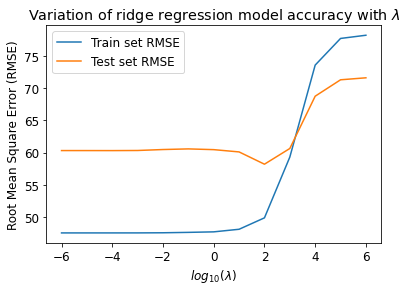

In [ ]:
plt.rcParams.update({'font.size': 12})

x_axis_range = np.arange(-6, 7)

plt.plot(x_axis_range, train_rmse_arr, label="Train set RMSE")
plt.plot(x_axis_range, test_rmse_arr, label="Test set RMSE")
plt.title("Variation of ridge regression model accuracy with $\lambda$")
plt.xlabel("$log_{10}(\lambda)$")
plt.ylabel("Root Mean Square Error (RMSE)")
plt.legend()

**Exercise:** Explain the reason behind the trends in the above plot.

####Hyper-Parameter Selection using Grid-Search

In the above program, we have taken an arbitrary 'alpha' value(regularization strength - lambda is the symbol used in class), and then plotted performance for a range of values.

But there is a function that will help us choose parameter values (even for multiple different parameters using grid-search. )


First let us make a pipeline for Ridge Regression!




In [ ]:
from sklearn.model_selection import GridSearchCV
X = diabetes["data"]
y = diabetes["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#Make a pipeline with all the transformations : polynomial basis transformation is also a transformation in the pipeline
ridge_pipeline  = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), StandardScaler(), Ridge(alpha=1e3, random_state=0) )
ridge_pipeline.fit(X_train,y_train)


# See that we get the same performance
y_train_pred = ridge_pipeline.predict(X_train)
train_rmse = np.mean((y_train - y_train_pred)**2)**0.5
print("Train set RMSE:", round(train_rmse, 4))

Train set RMSE: 59.292


In [ ]:
#Now let us define our grid - or the values we want to test performance for. 
#The parameter for an estimator should be labelled as <estimator_name><2 underscores><parameter_name>
params = {'ridge__alpha':[1,10,100,200,400,800,1000]}


#We create a gridsearch instance, with the desired pipeline to search on!
grid = GridSearchCV(ridge_pipeline, param_grid=params, cv=5)

#Train on all the values
grid.fit(X_train,y_train)

#We can get the best paramter values (which we can verify using the graph above - least test error at approximately log(lambda) = 2, which is around 100)
grid.best_params_

{'ridge__alpha': 100}

##**References**

[1]: `scikit-learn` Linear Regression Example: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html